# Car Data Explore
## Yuhan He
## 2020 Feb 27

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from math import sqrt

In [2]:
# Get the carrental data.
carRental_list = pd.read_csv('../Data/combined_car_rental_data.csv')
# Drop the useless index column.
del carRental_list['Unnamed: 0']
print(carRental_list)

      AGENCY       PDATE       DDATE  LOR  MIN_DAILY_FARE  AVG_DAILY_FARE  \
0         ZE  2019-01-01  2019-01-06    5       30.978000       72.084419   
1         ZR  2019-01-01  2019-01-02    1       18.760000       50.374389   
2         ZT  2019-01-01  2019-01-06    5       24.966000       38.488829   
3         ET  2019-01-01  2019-01-10    9       22.786667       59.388324   
4         ZD  2019-01-01  2019-01-10    9       26.008889       52.202661   
...      ...         ...         ...  ...             ...             ...   
28379     ZI  2019-12-31  2020-01-05    5       70.078000      123.885821   
28380     ZR  2019-12-31  2020-01-09    9       17.620000       60.839116   
28381     AL  2019-12-31  2020-01-30   30       36.514667       40.383893   
28382     ET  2019-12-31  2020-01-30   30       36.516000       40.616119   
28383     ZT  2019-12-31  2020-01-04    4       21.567500       70.956929   

       MONTH_PDATE  DAY_PDATE  
0                1          1  
1          

## Data Visualization for length of rental

In [3]:
# Look at the distribution of the length of rental
counts_LOR = carRental_list["LOR"].value_counts()
print(counts_LOR)

9     2920
8     2920
7     2920
6     2920
5     2920
4     2920
3     2920
2     2914
1     2902
30    2128
Name: LOR, dtype: int64


In [4]:
# Find the average and minimum daily fair of car rental data.
per_lor = carRental_list.groupby(['LOR']).mean()
per_lor = per_lor.reset_index().copy()
del per_lor["MONTH_PDATE"]
del per_lor["DAY_PDATE"]
print(per_lor)

   LOR  MIN_DAILY_FARE  AVG_DAILY_FARE
0    1       59.459128       85.919331
1    2       57.869858       83.367049
2    3       57.354244       83.393761
3    4       57.741573       81.829674
4    5       56.767837       86.112701
5    6       48.544624       71.461452
6    7       42.383167       63.641292
7    8       42.803929       62.662736
8    9       42.016525       60.598683
9   30       33.587271       37.101699


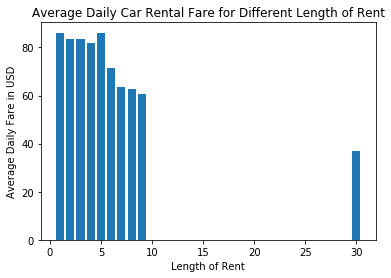

In [5]:
# Get the average price for car rental.
plt.bar(per_lor['LOR'], per_lor['AVG_DAILY_FARE'])
plt.title("Average Daily Car Rental Fare for Different Length of Rent")
plt.xlabel("Length of Rent")
plt.ylabel("Average Daily Fare in USD")
plt.show()

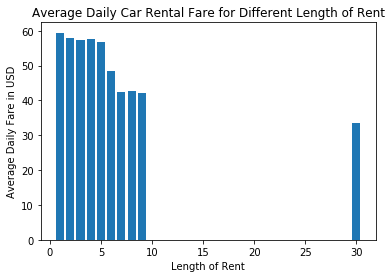

In [6]:
# Get the minimum and average price for car rental.
plt.bar(per_lor['LOR'], per_lor['MIN_DAILY_FARE'])
plt.title("Average Daily Car Rental Fare for Different Length of Rent")
plt.xlabel("Length of Rent")
plt.ylabel("Average Daily Fare in USD")
plt.show()

                 LOR  MIN_DAILY_FARE  AVG_DAILY_FARE  MONTH_PDATE  DAY_PDATE
PDATE                                                                       
2019-01-01  5.000000       32.485056       60.984059          1.0        1.0
2019-01-02  5.000000       30.063898       59.543899          1.0        2.0
2019-01-03  5.000000       28.221601       58.435075          1.0        3.0
2019-01-04  5.000000       27.703716       58.945431          1.0        4.0
2019-01-05  5.000000       28.039725       56.268131          1.0        5.0
...              ...             ...             ...          ...        ...
2019-12-27  7.906667       87.785577      107.102673         12.0       27.0
2019-12-28  7.906667       88.138252      106.774935         12.0       28.0
2019-12-29  7.500000       58.091526       91.263898         12.0       29.0
2019-12-30  7.500000       40.317329       80.674819         12.0       30.0
2019-12-31  7.500000       39.774942       76.256258         12.0       31.0

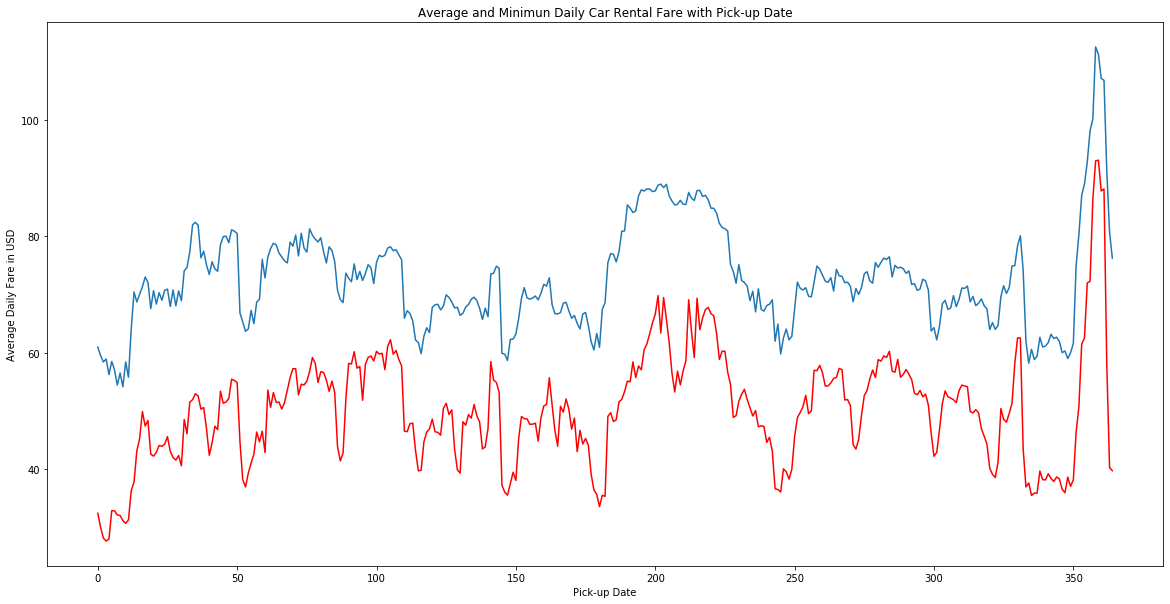

In [7]:
# Get the mean price for each day group by the pickup date.
mean_per_day = carRental_list.groupby(["PDATE"]).mean()
print(mean_per_day)

# Plot the price for each day
plt.figure(figsize=(20,10))
plt.plot([i for i in range(0, 365)], mean_per_day['AVG_DAILY_FARE'])
plt.plot([i for i in range(0, 365)], mean_per_day['MIN_DAILY_FARE'], color = "red")
plt.title("Average and Minimun Daily Car Rental Fare with Pick-up Date")
plt.xlabel("Pick-up Date")
plt.ylabel("Average Daily Fare in USD")
plt.show()

In [8]:
# Add week number to the full dataset
week_list = list()
for i in range(0, 53):
    for j in range(0, 7):
        week_list.append(i)
mean_per_day["WEEK_NUM"] = week_list[0:365]
mean_per_week = mean_per_day.groupby(["WEEK_NUM"]).mean()

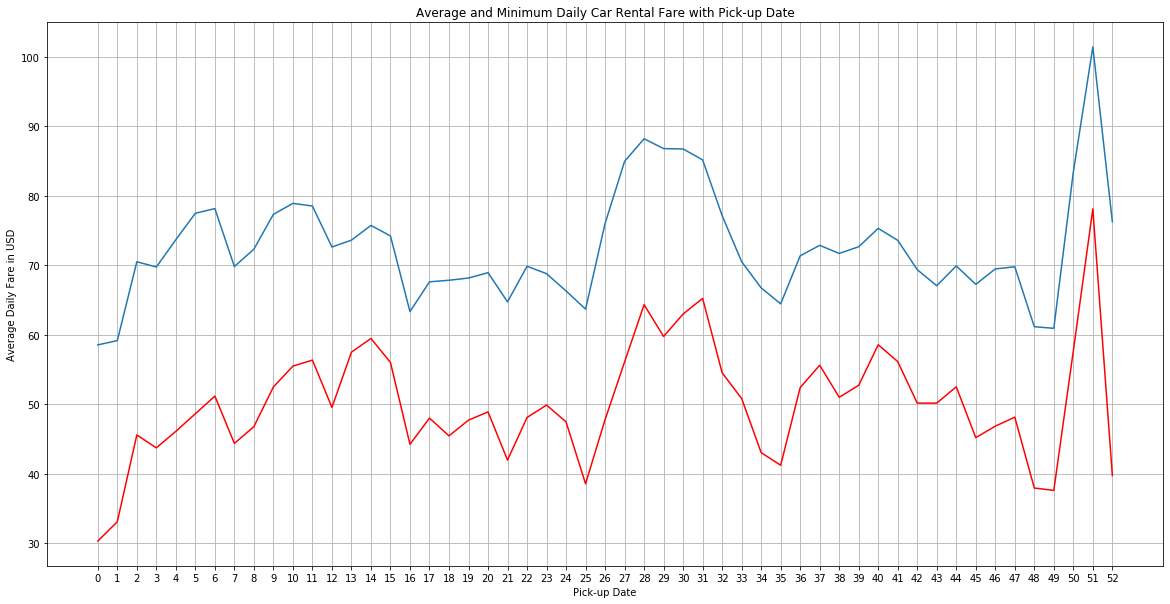

In [9]:
# Plot the price group by week
plt.figure(figsize=(20,10))
plt.plot([i for i in range(0, 53)], mean_per_week['AVG_DAILY_FARE'])
plt.plot([i for i in range(0, 53)], mean_per_week['MIN_DAILY_FARE'], color = "red")
plt.title("Average and Minimum Daily Car Rental Fare with Pick-up Date")
plt.xticks(range(0, 53))
plt.xlabel("Pick-up Date")
plt.ylabel("Average Daily Fare in USD")
plt.grid()
plt.show()

## LOR one day data

In [10]:
# Focus on one day rental.
LOR_one_day = carRental_list[carRental_list["LOR"] == 1]
mean_one_day = LOR_one_day.groupby(["PDATE"]).mean()
print(LOR_one_day)
print(mean_one_day)

      AGENCY       PDATE       DDATE  LOR  MIN_DAILY_FARE  AVG_DAILY_FARE  \
1         ZR  2019-01-01  2019-01-02    1           18.76       50.374389   
35        ZT  2019-01-01  2019-01-02    1           18.71       57.391594   
38        ET  2019-01-01  2019-01-02    1           27.92       67.090536   
48        AL  2019-01-01  2019-01-02    1           24.94       64.508868   
49        ZD  2019-01-01  2019-01-02    1           38.81       81.899718   
...      ...         ...         ...  ...             ...             ...   
28331     ZR  2019-12-31  2020-01-01    1           21.66       72.073471   
28335     ZT  2019-12-31  2020-01-01    1           21.66       66.394873   
28340     ZE  2019-12-31  2020-01-01    1           53.02       92.080168   
28360     ET  2019-12-31  2020-01-01    1           23.29       77.224283   
28377     ZL  2019-12-31  2020-01-01    1           65.73      102.988008   

       MONTH_PDATE  DAY_PDATE  
1                1          1  
35         

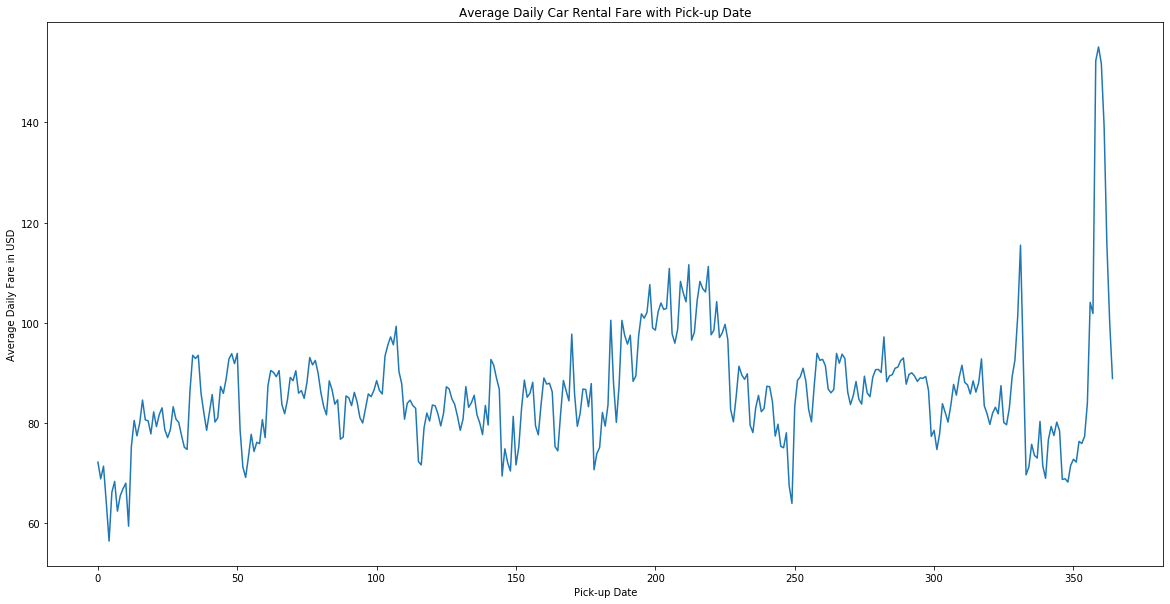

In [11]:
# Plot the data of one day LOR
plt.figure(figsize=(20,10))
plt.plot([i for i in range(0, 365)], mean_one_day['AVG_DAILY_FARE'])
plt.title("Average Daily Car Rental Fare with Pick-up Date")
plt.xlabel("Pick-up Date")
plt.ylabel("Average Daily Fare in USD")
plt.show()

In [12]:
# Add week number for one day LOR data
week_list = list()
for i in range(0, 53):
    for j in range(0, 7):
        week_list.append(i)
mean_one_day["WEEK_NUM"] = week_list[0:365]
mean_one_week = mean_one_day.groupby(["WEEK_NUM"]).mean()

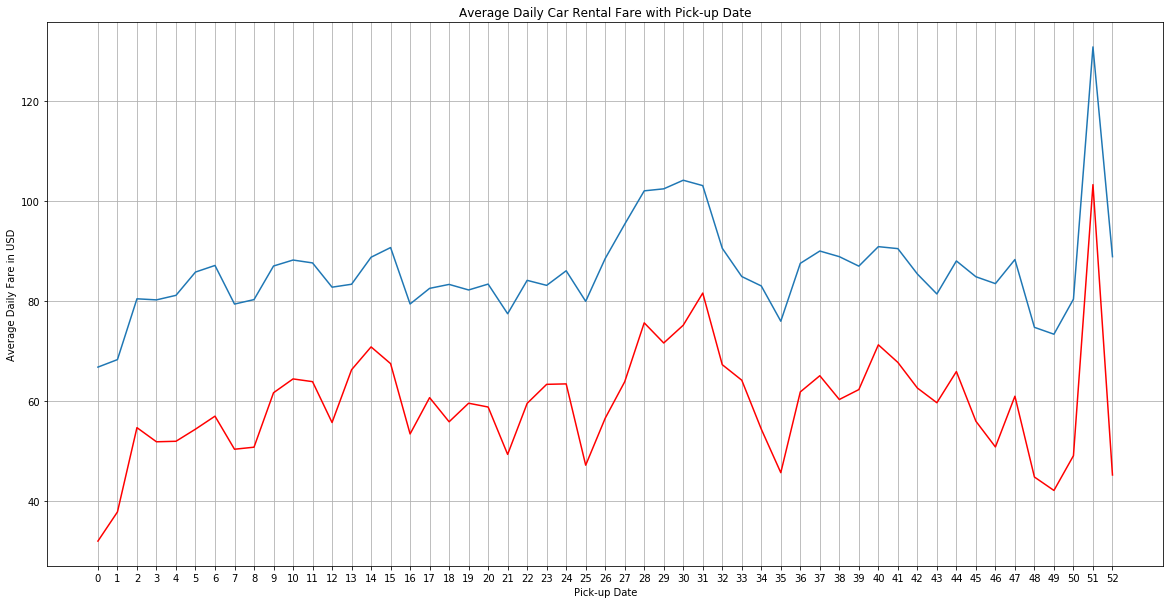

In [13]:
# Plot ond day LOR data group by week
plt.figure(figsize=(20,10))
plt.plot([i for i in range(0, 53)], mean_one_week['AVG_DAILY_FARE'])
plt.plot([i for i in range(0, 53)], mean_one_week['MIN_DAILY_FARE'], color = "red")
plt.title("Average Daily Car Rental Fare with Pick-up Date")
plt.xticks(range(0, 53))
plt.xlabel("Pick-up Date")
plt.ylabel("Average Daily Fare in USD")
plt.grid()
plt.show()

## Plot all data group by week

In [14]:
month_rental = LOR_one_day.groupby(['MONTH_PDATE']).mean()
print(month_rental)

             LOR  MIN_DAILY_FARE  AVG_DAILY_FARE  DAY_PDATE
MONTH_PDATE                                                
1            1.0       44.664113       74.519067  16.000000
2            1.0       53.328259       82.974551  14.500000
3            1.0       60.103508       86.164893  16.000000
4            1.0       64.459625       85.408549  15.500000
5            1.0       56.713710       81.828123  16.000000
6            1.0       59.028559       83.176158  15.411017
7            1.0       65.934711       97.044030  15.838843
8            1.0       70.431048       93.349765  16.000000
9            1.0       57.073167       85.168915  15.500000
10           1.0       64.908306       87.547299  16.000000
11           1.0       60.098375       86.678236  15.500000
12           1.0       56.312125       87.043887  15.641667


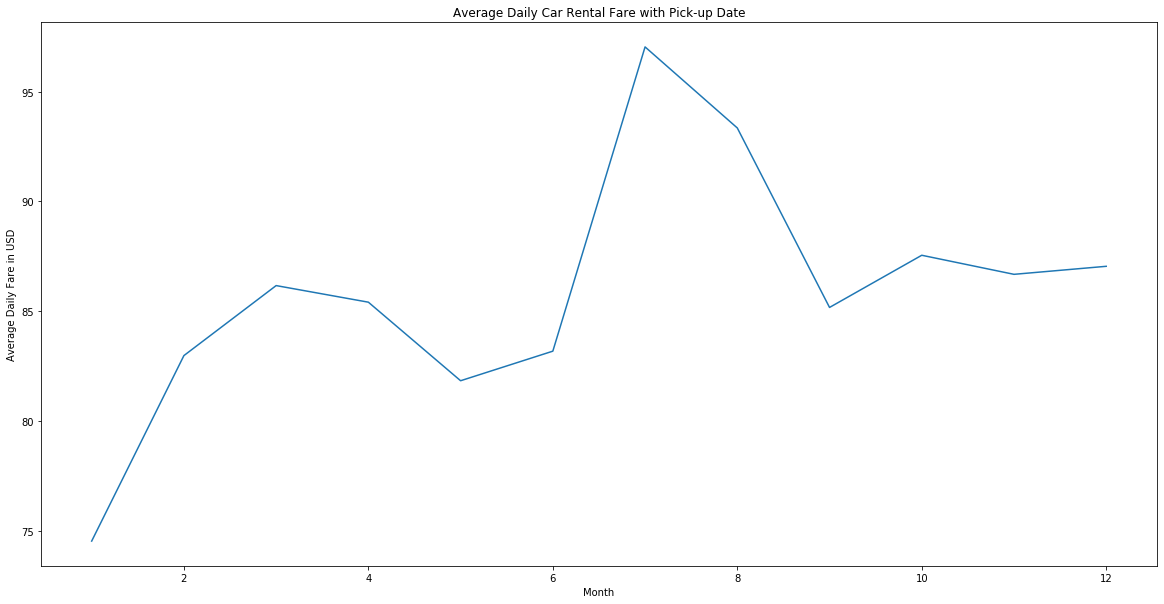

In [15]:
plt.figure(figsize=(20,10))
plt.plot([i for i in range(1,13)], month_rental['AVG_DAILY_FARE'])
plt.title("Average Daily Car Rental Fare with Pick-up Date")
plt.xlabel("Month")
plt.ylabel("Average Daily Fare in USD")
plt.show()

In [16]:
# Have a look of mean per day for one day car rental
print(mean_one_day)
print(mean_one_day.index)

            LOR  MIN_DAILY_FARE  AVG_DAILY_FARE  MONTH_PDATE  DAY_PDATE  \
PDATE                                                                     
2019-01-01    1        36.26125       72.236136            1          1   
2019-01-02    1        30.87750       68.904458            1          2   
2019-01-03    1        30.06375       71.435971            1          3   
2019-01-04    1        26.27000       64.194477            1          4   
2019-01-05    1        25.96625       56.488843            1          5   
...         ...             ...             ...          ...        ...   
2019-12-27    1       132.64000      151.743843           12         27   
2019-12-28    1       120.03400      139.225788           12         28   
2019-12-29    1        78.84250      115.562041           12         29   
2019-12-30    1        46.57625      100.138032           12         30   
2019-12-31    1        45.27375       88.916408           12         31   

            WEEK_NUM  
P

In [17]:
avg_list = mean_one_day["AVG_DAILY_FARE"]
print(avg_list.head(21))

PDATE
2019-01-01    72.236136
2019-01-02    68.904458
2019-01-03    71.435971
2019-01-04    64.194477
2019-01-05    56.488843
2019-01-06    66.220212
2019-01-07    68.381300
2019-01-08    62.456964
2019-01-09    65.521162
2019-01-10    66.924194
2019-01-11    68.041205
2019-01-12    59.466107
2019-01-13    75.392151
2019-01-14    80.557756
2019-01-15    77.481653
2019-01-16    80.061314
2019-01-17    84.620539
2019-01-18    80.653865
2019-01-19    80.486817
2019-01-20    77.871938
2019-01-21    82.255636
Name: AVG_DAILY_FARE, dtype: float64


In [18]:
m_list = [avg_list[i] for i in range(6, len(avg_list), 7)]
t_list = [avg_list[i] for i in range(0, len(avg_list), 7)]
w_list = [avg_list[i] for i in range(1, len(avg_list), 7)]
th_list = [avg_list[i] for i in range(2, len(avg_list), 7)]
f_list = [avg_list[i] for i in range(3, len(avg_list), 7)]
sa_list = [avg_list[i] for i in range(4, len(avg_list), 7)]
sun_list = [avg_list[i] for i in range(5, len(avg_list), 7)]

In [19]:
np.mean(m_list + t_list + w_list + th_list + f_list)

87.3431509685344

In [20]:
np.mean(sa_list + sun_list)

83.00865576924463

In [21]:
np.mean(m_list + t_list + w_list + th_list)

88.2468581215923

In [22]:
np.mean(sa_list + sun_list + f_list)

83.24275163702652

### Build the Model

How we interpret features?<br>
AGENCY: agency that provides car rental service. From EDA, we know the distribution for each agency is quite even.<br>
-> convert to numerical (1 hot encoding for now)<br>
<br>
PDATE: pick up date<br>
-> Possible conversion to datetime object (like in ARIMA), till then use numerical converted PDATE_month, day for now<br>
<br>
DDATE: drop/return date<br>
-> Drop because it can be calculated by PDATE and LOR<br>
<br>
LOR: length of rent (in days)<br>
-> already numerical data (int)<br>
<br>
MIN_DAILY_FARE: minimium daily rental fare<br>
-> currently not used this one<br>
<br>
AVG_DAILY_FARE: average daily rental fare<br>
-> numerical value to be predicted<br>
<br>
MONTH_PDATE, DAY_PDATE: newly generated values from PDATE<br>
-> to be used in model<br>

In [23]:
print(carRental_list)

      AGENCY       PDATE       DDATE  LOR  MIN_DAILY_FARE  AVG_DAILY_FARE  \
0         ZE  2019-01-01  2019-01-06    5       30.978000       72.084419   
1         ZR  2019-01-01  2019-01-02    1       18.760000       50.374389   
2         ZT  2019-01-01  2019-01-06    5       24.966000       38.488829   
3         ET  2019-01-01  2019-01-10    9       22.786667       59.388324   
4         ZD  2019-01-01  2019-01-10    9       26.008889       52.202661   
...      ...         ...         ...  ...             ...             ...   
28379     ZI  2019-12-31  2020-01-05    5       70.078000      123.885821   
28380     ZR  2019-12-31  2020-01-09    9       17.620000       60.839116   
28381     AL  2019-12-31  2020-01-30   30       36.514667       40.383893   
28382     ET  2019-12-31  2020-01-30   30       36.516000       40.616119   
28383     ZT  2019-12-31  2020-01-04    4       21.567500       70.956929   

       MONTH_PDATE  DAY_PDATE  
0                1          1  
1          

In [24]:
d_regression1 = carRental_list.copy()
drop_columns = ["PDATE", "DDATE", "MIN_DAILY_FARE", "AVG_DAILY_FARE", "DAY_PDATE"]
d_regression1.drop(columns = drop_columns , axis=1, inplace = True)
d_regression1 = pd.get_dummies(d_regression1, columns=['AGENCY'], drop_first=True)
d_regression1 = pd.get_dummies(d_regression1 ,columns=['MONTH_PDATE'], drop_first=True)
d_regression1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28384 entries, 0 to 28383
Data columns (total 19 columns):
LOR               28384 non-null int64
AGENCY_ET         28384 non-null uint8
AGENCY_ZD         28384 non-null uint8
AGENCY_ZE         28384 non-null uint8
AGENCY_ZI         28384 non-null uint8
AGENCY_ZL         28384 non-null uint8
AGENCY_ZR         28384 non-null uint8
AGENCY_ZT         28384 non-null uint8
MONTH_PDATE_2     28384 non-null uint8
MONTH_PDATE_3     28384 non-null uint8
MONTH_PDATE_4     28384 non-null uint8
MONTH_PDATE_5     28384 non-null uint8
MONTH_PDATE_6     28384 non-null uint8
MONTH_PDATE_7     28384 non-null uint8
MONTH_PDATE_8     28384 non-null uint8
MONTH_PDATE_9     28384 non-null uint8
MONTH_PDATE_10    28384 non-null uint8
MONTH_PDATE_11    28384 non-null uint8
MONTH_PDATE_12    28384 non-null uint8
dtypes: int64(1), uint8(18)
memory usage: 720.8 KB


In [25]:
d_regression1.head()

,LOR,AGENCY_ET,AGENCY_ZD,AGENCY_ZE,AGENCY_ZI,AGENCY_ZL,AGENCY_ZR,AGENCY_ZT,MONTH_PDATE_2,MONTH_PDATE_3,MONTH_PDATE_4,MONTH_PDATE_5,MONTH_PDATE_6,MONTH_PDATE_7,MONTH_PDATE_8,MONTH_PDATE_9,MONTH_PDATE_10,MONTH_PDATE_11,MONTH_PDATE_12
0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
X = d_regression1
y = carRental_list["AVG_DAILY_FARE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Train RMSE error", sqrt(mean_squared_error(y_train, reg.predict(X_train))))
print("Test RMSE error", sqrt(mean_squared_error(y_test, reg.predict(X_test))))
print("Coefficients")
for x, y in zip(X_train.columns.tolist(), reg.coef_):
    print(x,round(y,2))

Train RMSE error 11.993158668827746
Test RMSE error 11.607993650486337
Coefficients
LOR -1.83
AGENCY_ET 2.84
AGENCY_ZD -3.8
AGENCY_ZE 2.0
AGENCY_ZI 6.19
AGENCY_ZL 15.42
AGENCY_ZR -10.3
AGENCY_ZT -10.58
MONTH_PDATE_2 9.63
MONTH_PDATE_3 12.01
MONTH_PDATE_4 9.71
MONTH_PDATE_5 7.31
MONTH_PDATE_6 7.11
MONTH_PDATE_7 23.21
MONTH_PDATE_8 17.4
MONTH_PDATE_9 9.26
MONTH_PDATE_10 11.49
MONTH_PDATE_11 9.48
MONTH_PDATE_12 15.36


In [28]:
clf = linear_model.Lasso()
clf.fit(X_train, y_train)
print("Train RMSE error", sqrt(mean_squared_error(y_train, clf.predict(X_train))))
print("Test RMSE error", sqrt(mean_squared_error(y_test, clf.predict(X_test))))
print("Coefficients")
for x, y in zip(X_train.columns.tolist(), clf.coef_):
    print(x,round(y,2))

Train RMSE error 14.353297682501244
Test RMSE error 13.99887043334714
Coefficients
LOR -1.76
AGENCY_ET 0.0
AGENCY_ZD -0.0
AGENCY_ZE 0.0
AGENCY_ZI 0.0
AGENCY_ZL 7.63
AGENCY_ZR -2.15
AGENCY_ZT -2.31
MONTH_PDATE_2 -0.0
MONTH_PDATE_3 0.0
MONTH_PDATE_4 -0.0
MONTH_PDATE_5 -0.0
MONTH_PDATE_6 -0.0
MONTH_PDATE_7 0.54
MONTH_PDATE_8 0.0
MONTH_PDATE_9 -0.0
MONTH_PDATE_10 0.0
MONTH_PDATE_11 -0.0
MONTH_PDATE_12 0.0
